In [1050]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

df = pd.read_csv('auto-mpg.csv')

In [1051]:
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [1052]:
df_new = df.drop(columns=['car name'])
df_new.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [1053]:
df_new.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [1054]:
df_new.replace('?', 92, inplace=True) 
# 92 was the median when we made ? -> 0 
# Now replacing ? with 92 to balance the misiing value here
df_new.head(5)



,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [1055]:
df_new['weight^2'] = pd.to_numeric(df_new['weight'], errors='coerce') * pd.to_numeric(df_new['weight'], errors='coerce')
df_new['displacement^2'] = pd.to_numeric(df_new['weight'], errors='coerce') * pd.to_numeric(df_new['displacement'], errors='coerce')
df_new['horsepower^2'] = pd.to_numeric(df_new['horsepower'], errors='coerce') * pd.to_numeric(df_new['horsepower'], errors='coerce')

In [1056]:
df_new.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,weight^2,displacement^2,horsepower^2
0,18.0,8,307.0,130,3504,12.0,70,1,12278016,1075728.0,16900
1,15.0,8,350.0,165,3693,11.5,70,1,13638249,1292550.0,27225
2,18.0,8,318.0,150,3436,11.0,70,1,11806096,1092648.0,22500
3,16.0,8,304.0,150,3433,12.0,70,1,11785489,1043632.0,22500
4,17.0,8,302.0,140,3449,10.5,70,1,11895601,1041598.0,19600


C:\Users\Asus\AppData\Local\Temp\ipykernel_27888\3143333671.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='origin', y='mpg', data=df_new, palette='viridis', dodge=True).set_xticklabels(['Europe', 'USA', 'Japan'])
C:\Users\Asus\AppData\Local\Temp\ipykernel_27888\3143333671.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.barplot(x='origin', y='mpg', data=df_new, palette='viridis', dodge=True).set_xticklabels(['Europe', 'USA', 'Japan'])


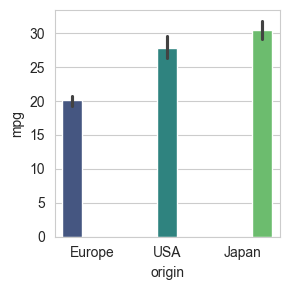

In [1057]:
plot.figure(figsize=(3,3))
sns.set_style('whitegrid')
sns.barplot(x='origin', y='mpg', data=df_new, palette='viridis', dodge=True).set_xticklabels(['Europe', 'USA', 'Japan'])
plot.tight_layout()
plot.show()


<Axes: >

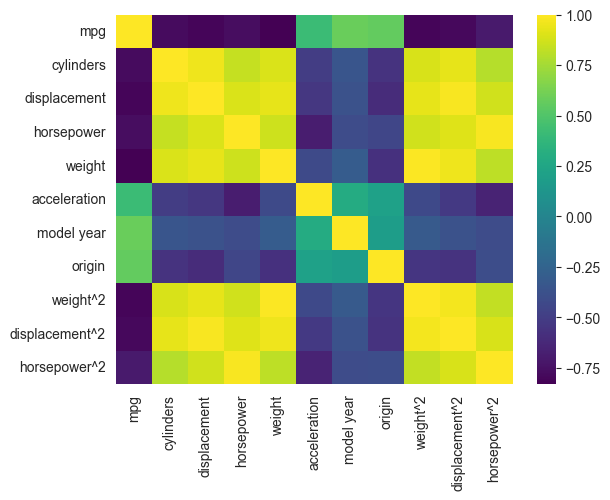

In [1058]:

sns.heatmap(df_new.corr(), cmap='viridis')

In [1059]:
df_new.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,weight^2,displacement^2,horsepower^2
mpg,1.000000,-0.775396,-0.804203,-0.773655,-0.831741,0.420289,0.579267,0.563450,-0.805849,-0.791493,-0.708542
cylinders,-0.775396,1.000000,0.950721,0.841525,0.896017,-0.505419,-0.348746,-0.562543,0.889918,0.930605,0.798271
displacement,-0.804203,0.950721,1.000000,0.895984,0.932824,-0.543684,-0.370164,-0.609409,0.928907,0.984185,0.867816
horsepower,-0.773655,0.841525,0.895984,1.000000,0.862615,-0.686843,-0.413978,-0.451838,0.868563,0.907119,0.982797
weight,-0.831741,0.896017,0.932824,0.862615,1.000000,-0.417457,-0.306564,-0.581024,0.991953,0.956144,0.814365
acceleration,0.420289,-0.505419,-0.543684,-0.686843,-0.417457,1.000000,0.288137,0.205873,-0.427367,-0.525801,-0.657461
model year,0.579267,-0.348746,-0.370164,-0.413978,-0.306564,0.288137,1.000000,0.180662,-0.323197,-0.369401,-0.416074
origin,0.563450,-0.562543,-0.609409,-0.451838,-0.581024,0.205873,0.180662,1.000000,-0.547993,-0.563139,-0.408954
weight^2,-0.805849,0.889918,0.928907,0.868563,0.991953,-0.427367,-0.323197,-0.547993,1.000000,0.967987,0.833221
displacement^2,-0.791493,0.930605,0.984185,0.907119,0.956144,-0.525801,-0.369401,-0.563139,0.967987,1.000000,0.887805


In [1060]:
df_new.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'weight^2', 'displacement^2',
       'horsepower^2'],
      dtype='object')

In [1061]:
# pre-processing of data
y = df_new['mpg']
x = df_new[['displacement','horsepower', 'weight^2', 'horsepower^2', 'displacement^2']]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [1062]:
reg = LinearRegression()
reg.fit(x_train, y_train)
print(reg.coef_)
print(reg.intercept_, "\n")

r2_score_test_accuracy = reg.score(x_test,y_test)
print(f"R2_score of : {r2_score_test_accuracy} \n")




[-1.01915303e-01 -2.04701787e-01 -1.46861051e-06  5.04186941e-04
  2.83685559e-05]
53.7730297609083 

R2_score of : 0.8186684414184446 



In [1063]:
# prediction
y_pred_test = reg.predict(x_test)
y_pred_train = reg.predict(x_train)
pred_df = pd.DataFrame({'predicted_value': y_pred_test.squeeze(), 'actual_value': y_test.squeeze()})
pred_df.head(10)

,predicted_value,actual_value
77,28.155606,22.0
208,14.748311,13.0
307,21.813631,26.8
20,26.422300,25.0
221,15.069933,17.5
146,30.877862,28.0
180,23.259486,25.0
64,14.194934,15.0
356,29.339133,32.4
357,25.001979,32.9


In [1064]:
# TESTING 
from sklearn.metrics import mean_squared_error
r2_score_manually = reg.score(x_test,y_test)
print(f"R2_score: {r2_score_manually}")
MSE = mean_squared_error(y_test, y_pred_test)
print(f"MSE: {MSE}")
print(f"RMSE: {np.sqrt(MSE)} \n")

mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
mape_test = mean_absolute_percentage_error(y_test,y_pred_test)
print(f"MAPE_train: {(1-mape_train)*100}")
print(f"MAPE_test: {(1-mape_test)*100}")

R2_score: 0.8186684414184446
MSE: 10.70797306420215
RMSE: 3.2723039382371177 

MAPE_train: 87.616384961936
MAPE_test: 88.99311541169162
